https://pypi.org/project/censusgeocode/

In [50]:
import censusgeocode as cg

In [2]:
import numpy as np
import pandas as pd
census_number = np.load('census tract numbers.npy',allow_pickle=True)

In [5]:
import geopandas
import numpy as np
import pandas as pd

polygons = geopandas.read_file("/Users/annieouyang/Downloads/cb_2018_06_tract_500k 2")
polygons

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,06,009,000300,1400000US06009000300,06009000300,3,CT,457009794,394122,"POLYGON ((-120.76399 38.21389, -120.76197 38.2..."
1,06,011,000300,1400000US06011000300,06011000300,3,CT,952744514,195376,"POLYGON ((-122.50006 39.12232, -122.50022 39.1..."
2,06,013,303102,1400000US06013303102,06013303102,3031.02,CT,6507019,0,"POLYGON ((-121.72937 37.96884, -121.71409 37.9..."
3,06,013,303202,1400000US06013303202,06013303202,3032.02,CT,3725528,0,"POLYGON ((-121.72346 37.96161, -121.71672 37.9..."
4,06,013,303203,1400000US06013303203,06013303203,3032.03,CT,6354210,0,"POLYGON ((-121.74486 37.95681, -121.74425 37.9..."
...,...,...,...,...,...,...,...,...,...,...
8036,06,075,022902,1400000US06075022902,06075022902,229.02,CT,161833,0,"POLYGON ((-122.41205 37.75423, -122.40925 37.7..."
8037,06,065,044804,1400000US06065044804,06065044804,448.04,CT,2374766,248057,"POLYGON ((-116.51068 33.80502, -116.51069 33.8..."
8038,06,099,003300,1400000US06099003300,06099003300,33,CT,640784444,2596432,"POLYGON ((-121.48677 37.47565, -121.48341 37.4..."
8039,06,037,124400,1400000US06037124400,06037124400,1244,CT,961439,14163,"POLYGON ((-118.41379 34.17940, -118.41160 34.1..."


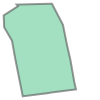

In [6]:
sf = polygons[polygons.COUNTYFP == '075']
sf.geometry.iloc[0]

In [99]:
sf.to_csv('sf polygons.csv')

In [7]:
x, y = sf.geometry.iloc[0].exterior.coords.xy
x,y

(array('d', [-122.426671, -122.424876, -122.42504116215702, -122.42061231511501, -122.419224, -122.418718, -122.41828100000001, -122.417799, -122.417587, -122.420769, -122.420883, -122.424275, -122.424464, -122.424835, -122.425209, -122.425628, -122.426613, -122.426671]),
 array('d', [37.809639, 37.810798999999996, 37.811001508766, 37.811112170060404, 37.808453, 37.805932, 37.804023, 37.801266999999996, 37.800340999999996, 37.799938999999995, 37.799901999999996, 37.799472, 37.800402, 37.802268, 37.804133, 37.806456, 37.808152, 37.809639]))

### Mapping neighborhoods to census tracts

In [49]:
# mapping neighb
neigh = pd.read_csv('/Users/annieouyang/Downloads/Analysis_Neighborhoods.csv')
neigh['TRACTCE']=['0'+x if len(x)==5 else x for x in neigh['TRACTCE10'].astype(str)]
sf_neighborhoods = sf.merge(neigh[['NHOOD','TRACTCE']].astype(str),left_on ='TRACTCE',right_on='TRACTCE')

In [44]:
sf_neighborhoods.to_csv('sf_neighborhoods')